In [296]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime


## 1. Daily Energy Consumption of BTC Network

`total_energy_df` contains lower, upper bound and estimated values of annualized total energy consumption for every day since 2014-07-01.

Note that the unit for the energy consumption is TWh/year.

In [297]:
total_energy_df = pd.read_csv("./source/cbeci_export.csv")
total_energy_df

,Timestamp,Date and Time,MAX,MIN,GUESS
0,1404172800,2014-07-01T00:00:00,11.6968,9.84480,10.72210
1,1404259200,2014-07-02T00:00:00,11.8727,5.31064,8.33358
2,1404345600,2014-07-03T00:00:00,11.9899,3.80303,7.56635
3,1404432000,2014-07-04T00:00:00,12.6422,3.08748,7.47565
4,1404518400,2014-07-05T00:00:00,12.7873,2.64228,7.29972
...,...,...,...,...,...
2544,1623974400,2021-06-18T00:00:00,228.3420,34.07420,94.78930
2545,1624060800,2021-06-19T00:00:00,219.3130,32.72680,91.04100
2546,1624147200,2021-06-20T00:00:00,211.1960,31.51560,87.67160
2547,1624233600,2021-06-21T00:00:00,203.7510,30.40460,84.58100


In [298]:
first_ts = total_energy_df.iloc[0]['Timestamp']
last_ts = total_energy_df.iloc[-1]['Timestamp']

first_ts, last_ts

(1404172800, 1624320000)

In [299]:
def annualize_factor_2021():
    return 365 / (datetime.datetime.fromtimestamp(last_ts) - datetime.datetime(2021,1,1)).days

annualize_factor_2021()

2.134502923976608

To calcualte the daily energy consumption, the following transformation is done:


In [300]:
total_energy_df['datetime'] = pd.to_datetime(total_energy_df['Date and Time'])
total_energy_df['lower_gwh_d'] = total_energy_df['MIN'] * 1000 / 365
total_energy_df['upper_gwh_d'] = total_energy_df['MAX'] * 1000 / 365
total_energy_df['estimated_gwh_d'] = total_energy_df['GUESS'] * 1000 / 365

In [301]:
df = total_energy_df[['datetime', 'lower_gwh_d', 'upper_gwh_d', 'estimated_gwh_d']]
df = df.set_index(total_energy_df['datetime'])

In [302]:
df

,datetime,lower_gwh_d,upper_gwh_d,estimated_gwh_d
datetime,,,,
2014-07-01,2014-07-01,26.972055,32.046027,29.375616
2014-07-02,2014-07-02,14.549699,32.527945,22.831726
2014-07-03,2014-07-03,10.419260,32.849041,20.729726
2014-07-04,2014-07-04,8.458849,34.636164,20.481233
2014-07-05,2014-07-05,7.239123,35.033699,19.999233
...,...,...,...,...
2021-06-18,2021-06-18,93.353973,625.594521,259.696712
2021-06-19,2021-06-19,89.662466,600.857534,249.427397
2021-06-20,2021-06-20,86.344110,578.619178,240.196164


### Visualizing Daily Energy Consumption of Bitcoin Network

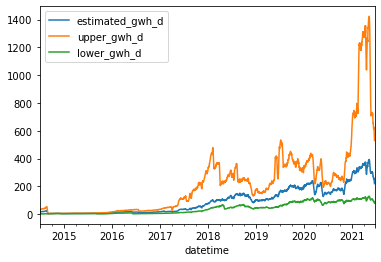

In [303]:
df[['estimated_gwh_d', 'upper_gwh_d', 'lower_gwh_d']].plot()

## 2. Daily Average Energy Consumption of a BTC Transaction

The average energy consumption of a single BTC transaction for each day will be calculated as follows:



In [304]:
btc_txn_count_df = pd.read_csv("./source/btc_txn_count.csv")
btc_txn_count_df['datetime'] = pd.to_datetime(btc_txn_count_df['day'])
btc_txn_count_df = btc_txn_count_df.set_index(btc_txn_count_df['datetime'])
btc_txn_count_df.drop(['datetime', 'day'], axis=1, inplace=True)
btc_txn_count_df

,count
datetime,
2021-06-22,196523
2021-06-21,205050
2021-06-20,167249
2021-06-19,187042
2021-06-18,222918
...,...
2009-01-12,101
2009-01-11,93
2009-01-10,61


### Visualizing Daily BTC Transaction Count

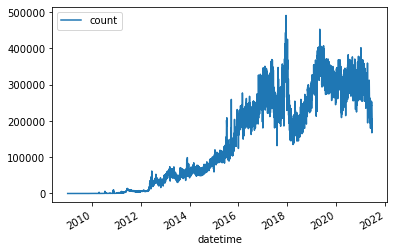

In [305]:
btc_txn_count_df.plot()

Take inner join between two dfs

In [306]:
df = df.join(btc_txn_count_df)
df

,datetime,lower_gwh_d,upper_gwh_d,estimated_gwh_d,count
datetime,,,,,
2014-07-01,2014-07-01,26.972055,32.046027,29.375616,69443
2014-07-02,2014-07-02,14.549699,32.527945,22.831726,66728
2014-07-03,2014-07-03,10.419260,32.849041,20.729726,62849
2014-07-04,2014-07-04,8.458849,34.636164,20.481233,59494
2014-07-05,2014-07-05,7.239123,35.033699,19.999233,49954
...,...,...,...,...,...
2021-06-18,2021-06-18,93.353973,625.594521,259.696712,222918
2021-06-19,2021-06-19,89.662466,600.857534,249.427397,187042
2021-06-20,2021-06-20,86.344110,578.619178,240.196164,167249


In [307]:
df['txn_lower_kwh_d'] = df['lower_gwh_d'] * 1000000 / df['count']
df['txn_upper_kwh_d'] = df['upper_gwh_d'] * 1000000 / df['count']
df['txn_estimated_kwh_d'] = df['estimated_gwh_d'] * 1000000 / df['count']

df

,datetime,lower_gwh_d,upper_gwh_d,estimated_gwh_d,count,txn_lower_kwh_d,txn_upper_kwh_d,txn_estimated_kwh_d
datetime,,,,,,,,
2014-07-01,2014-07-01,26.972055,32.046027,29.375616,69443,388.405668,461.472393,423.017675
2014-07-02,2014-07-02,14.549699,32.527945,22.831726,66728,218.044878,487.470705,342.161102
2014-07-03,2014-07-03,10.419260,32.849041,20.729726,62849,165.782435,522.666090,329.833824
2014-07-04,2014-07-04,8.458849,34.636164,20.481233,59494,142.179872,582.179117,344.257116
2014-07-05,2014-07-05,7.239123,35.033699,19.999233,49954,144.915788,701.319186,400.352982
...,...,...,...,...,...,...,...,...
2021-06-18,2021-06-18,93.353973,625.594521,259.696712,222918,418.781671,2806.388540,1164.987629
2021-06-19,2021-06-19,89.662466,600.857534,249.427397,187042,479.370760,3212.420388,1333.536838
2021-06-20,2021-06-20,86.344110,578.619178,240.196164,167249,516.260842,3459.627131,1436.159047


### Visualizing Daily Average Energy Consumption of a BTC Transaction

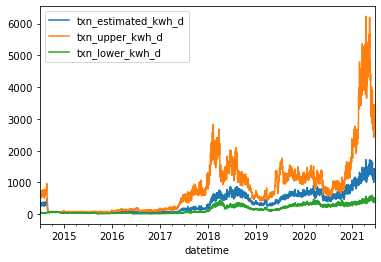

In [308]:
df[['txn_estimated_kwh_d', 'txn_upper_kwh_d', 'txn_lower_kwh_d']].plot()

## 3. Emission Factor of BTC Mining based on Geographic Distribution of Hashrate

The unit for emission factor is `kgCO2e / kWh`

In [309]:
emission_factor_df = pd.read_csv("./source/emission_factor.csv")
emission_factor_df

,Country,Emission Factor,Source,Year
0,Russia,0.352,IFI CM EC,2019
1,US,0.285,IFI CM EC,2019
2,Malaysia,0.470,IFI CM EC,2019
3,Iran,0.470,IFI CM EC,2019
4,Kazakhstan,0.653,IFI CM EC,2019
5,Libya,0.538,IFI CM EC,2019
6,Canada,0.231,IFI CM EC,2019
7,Norway,0.061,IFI CM EC,2019
8,Germany,0.366,IFI CM EC,2019
9,Thailand,0.390,IFI CM EC,2019


In [310]:
def emission_factor_by_country(country: str):
    return round(float(emission_factor_df[emission_factor_df['Country'] == country]['Emission Factor']), 5)

emission_factor_by_country("China_Beijing")

0.8

In [311]:
hashrate_dist_df = pd.read_csv("./source/btc_hashrate_distribution.csv")
hashrate_dist_df

,Year,Month,Country,Hashrate Distribution
0,2019,9,China_Xinjiang,0.3178
1,2019,9,China_Sichuan,0.1960
2,2019,9,China_Nei_Mongol,0.0813
3,2019,9,China_RoC,0.0766
4,2019,9,Russia,0.0593
...,...,...,...,...
163,2020,4,Germany,0.0056
164,2020,4,Norway,0.0048
165,2020,4,Venezuela,0.0042
166,2020,4,China_Guizhou,0.0040


In [312]:

hashrate_dist_df = hashrate_dist_df.replace("Rest", "World")
hashrate_dist_df['emission_factor'] = hashrate_dist_df['Country'].apply(lambda x: emission_factor_by_country(x))
hashrate_dist_df['emission_factor_dist'] = hashrate_dist_df['emission_factor'] * hashrate_dist_df['Hashrate Distribution']
emission_factors_ser = hashrate_dist_df.groupby(['Year', 'Month'])['emission_factor_dist'].sum()

In [313]:
emission_factors_ser

Year  Month
2019  9        0.642145
      10       0.639541
      11       0.630542
      12       0.636970
2020  1        0.638716
      2        0.634802
      3        0.624692
      4        0.618322
Name: emission_factor_dist, dtype: float64

In [314]:
from itertools import islice
from sortedcontainers import SortedDict 

# from https://stackoverflow.com/questions/7934547
def closest(sorted_dict, key):
    "Return closest key in `sorted_dict` to given `key`."
    keys = list(islice(sorted_dict.irange(minimum=key), 1))
    keys.extend(islice(sorted_dict.irange(maximum=key, reverse=True), 1))
    return min(keys, key=lambda k: abs(key - k))

In [315]:
emf = {}
for ym, v in emission_factors_ser.items():
    
    ts = int(datetime.datetime(ym[0], ym[1], 1).timestamp())
    emf[ts] = v
emission_factors = SortedDict(emf)


In [316]:
emission_factors

SortedDict({1567314000: 0.6421450999999999, 1569906000: 0.6395414999999998, 1572588000: 0.6305423000000001, 1575180000: 0.6369704999999999, 1577858400: 0.6387163999999999, 1580536800: 0.6348021000000001, 1583042400: 0.6246918000000002, 1585720800: 0.6183217999999999})

In [317]:
def btc_emission_factor_by_ts(timestamp):
    """
    Returns the BTC emission factor closest to timestamp.
    This value represents overall emission factor kgCO2/kWh of the Bitcoin network
    considering the geographic distribution of hashrate and the energy mix and emission factor
    of each mining region. 
    """
    # return emission_factors.get(timestamp, emission_factors[min(emission_factors.keys(), key=lambda k: abs(k-timestamp))]) 
    return emission_factors[closest(emission_factors, timestamp)]


btc_emission_factor_by_ts(datetime.datetime.now().timestamp())

0.6183217999999999

## 4. Daily Average Emission of a BTC transaction

In [318]:
df['emission_factor'] = df.apply(lambda x: btc_emission_factor_by_ts(x['datetime'].timestamp()), axis=1)
df['txn_lower_em_d'] = df['txn_lower_kwh_d'] * df['emission_factor']
df['txn_upper_em_d'] = df['txn_upper_kwh_d'] * df['emission_factor']
df['txn_estimated_em_d'] = df['txn_estimated_kwh_d'] * df['emission_factor']

df

,datetime,lower_gwh_d,upper_gwh_d,estimated_gwh_d,count,txn_lower_kwh_d,txn_upper_kwh_d,txn_estimated_kwh_d,emission_factor,txn_lower_em_d,txn_upper_em_d,txn_estimated_em_d
datetime,,,,,,,,,,,,
2014-07-01,2014-07-01,26.972055,32.046027,29.375616,69443,388.405668,461.472393,423.017675,0.642145,249.412796,296.332236,271.638728
2014-07-02,2014-07-02,14.549699,32.527945,22.831726,66728,218.044878,487.470705,342.161102,0.642145,140.016450,313.026925,219.717075
2014-07-03,2014-07-03,10.419260,32.849041,20.729726,62849,165.782435,522.666090,329.833824,0.642145,106.456378,335.627469,211.801174
2014-07-04,2014-07-04,8.458849,34.636164,20.481233,59494,142.179872,582.179117,344.257116,0.642145,91.300108,373.843467,221.063020
2014-07-05,2014-07-05,7.239123,35.033699,19.999233,49954,144.915788,701.319186,400.352982,0.642145,93.056963,450.348679,257.084706
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18,2021-06-18,93.353973,625.594521,259.696712,222918,418.781671,2806.388540,1164.987629,0.618322,258.941837,1735.251214,720.337248
2021-06-19,2021-06-19,89.662466,600.857534,249.427397,187042,479.370760,3212.420388,1333.536838,0.618322,296.405391,1986.309557,824.554898
2021-06-20,2021-06-20,86.344110,578.619178,240.196164,167249,516.260842,3459.627131,1436.159047,0.618322,319.215333,2139.162875,888.008447


In [319]:
etd = {}

for dt, row in df[['datetime', 'txn_lower_em_d', 'txn_upper_em_d', 'txn_estimated_em_d']].iterrows():
    etd[int(dt.timestamp())] = (row[1], row[2], row[3])

emission_txn_daily = SortedDict(etd)


In [320]:
def txn_emission_by_ts(timestamp):
    """Returns emission per txn closest to timestamp"""
    return emission_txn_daily[closest(emission_txn_daily, timestamp)]

lower, upper, estimate = txn_emission_by_ts(datetime.datetime.now().timestamp())

print(f"Today's estimated energy consumption: {round(estimate)}kg CO2-eq, (lower: {round(lower)}, upper: {round(upper)})")

Today's estimated energy consumption: 694kg CO2-eq, (lower: 249, upper: 1671)


### Visualizing Daily Average Emission of a BTC Transaction



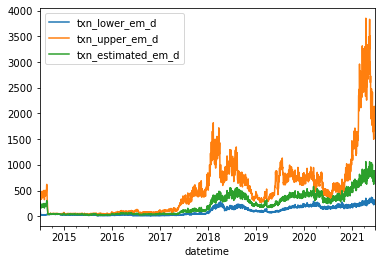

In [321]:
df[['txn_lower_em_d', 'txn_upper_em_d', 'txn_estimated_em_d']].plot()

### Exporting CSV of Daily Average Emission per BTC transaction

In [322]:
df[['txn_lower_em_d', 'txn_upper_em_d', 'txn_estimated_em_d']].to_csv('btc_txn_emissions_daily.csv', float_format='%g')

## 5. Yearly Analysis



In [323]:
total_df = df.groupby(df.datetime.dt.year).agg({'lower_gwh_d': 'sum', 'upper_gwh_d': 'sum', 'estimated_gwh_d': 'sum', 'count': 'sum'})

In [324]:
total_df['total_emission_lower_mt'] = total_df.apply(lambda x: x['lower_gwh_d'] * btc_emission_factor_by_ts(datetime.datetime(x.name, 1, 1).timestamp()) / 1000, axis=1)
total_df['total_emission_upper_mt'] = total_df.apply(lambda x: x['upper_gwh_d'] * btc_emission_factor_by_ts(datetime.datetime(x.name, 1, 1).timestamp()) / 1000, axis=1)	
total_df['total_emission_estimate_mt'] = total_df.apply(lambda x: x['estimated_gwh_d'] * btc_emission_factor_by_ts(datetime.datetime(x.name, 1, 1).timestamp()) / 1000, axis=1)


total_df = total_df.rename(columns={
    "lower_gwh_d": "total_energy_lower_gwh",                      # Lower bound total energy consumption of the BTC network per year      (GWh)
    "upper_gwh_d": "total_energy_upper_gwh",                      # Upper bound total energy consumption of the BTC network per year      (GWh)
    "estimated_gwh_d": "total_energy_estimate_gwh",               # Estimated total energy consumption of the BTC network per year        (GWh)
    "count": "tx_count",
})


### Yearly Total Energy Consumption of the BTC Network (GWh)

Note that this is not annualized for 2021; it is the sum of daily energy consumption between 01-01-2021 and 06-22-2021.

In [325]:
total_df[[ 'total_energy_estimate_gwh', 'total_energy_lower_gwh', 'total_energy_upper_gwh']]

,total_energy_estimate_gwh,total_energy_lower_gwh,total_energy_upper_gwh
datetime,,,
2014,1896.684740,789.104014,3200.672027
2015,2273.333123,1465.258047,3229.201945
2016,5450.182712,2083.982411,9989.971836
2017,13236.677863,5346.968055,45293.296986
2018,41624.684658,18900.680548,100805.957260
2019,54241.631233,23579.694795,111117.778904
2020,69841.854521,34430.544110,114962.498356
2021,55939.600274,19101.610959,172370.104110


### 2021 Annualized Total Energy Consumption of the BTC Network (GWh)

In [326]:
total_df[total_df.index == 2021][[ 'total_energy_estimate_gwh', 'total_energy_lower_gwh', 'total_energy_upper_gwh']] * annualize_factor_2021()

,total_energy_estimate_gwh,total_energy_lower_gwh,total_energy_upper_gwh
datetime,,,
2021,119403.240351,40772.444444,367924.491228


### Yearly Total CO2 Emission of the BTC Network (Mt CO2-eq)
Note that this is not annualized for 2021.

In [327]:
total_df[[ 'total_emission_estimate_mt', 'total_emission_lower_mt', 'total_emission_upper_mt']]

,total_emission_estimate_mt,total_emission_lower_mt,total_emission_upper_mt
datetime,,,
2014,1.217947,0.506719,2.055296
2015,1.459810,0.940908,2.073616
2016,3.499808,1.338219,6.415011
2017,8.499868,3.433529,29.084869
2018,26.729087,12.136979,64.732052
2019,34.830998,15.141585,71.353737
2020,44.609138,21.991353,73.428433
2021,34.588674,11.810942,106.580193


### 2021 Annualized Total CO2 Emission of the BTC Network (Mt CO2-eq)

In [328]:
total_df[total_df.index == 2021][[ 'total_emission_estimate_mt', 'total_emission_lower_mt', 'total_emission_upper_mt']] * annualize_factor_2021()

,total_emission_estimate_mt,total_emission_lower_mt,total_emission_upper_mt
datetime,,,
2021,73.829626,25.210491,227.495734


### Yearly Average CO2 Emission of a Single BTC Transaction (kg CO2-eq)

In [329]:
total_df['emission_txn_lower_kg'] = total_df['total_emission_lower_mt'] * 1e9 / total_df['tx_count']
total_df['emission_txn_upper_kg'] = total_df['total_emission_upper_mt'] * 1e9 / total_df['tx_count']
total_df['emission_txn_estimate_kg'] = total_df['total_emission_estimate_mt'] * 1e9 / total_df['tx_count']
total_df[['emission_txn_estimate_kg', 'emission_txn_lower_kg', 'emission_txn_upper_kg', 'tx_count']]

,emission_txn_estimate_kg,emission_txn_lower_kg,emission_txn_upper_kg,tx_count
datetime,,,,
2014,88.283763,36.729916,148.979619,13795819
2015,31.961488,20.600512,45.400341,45674023
2016,42.356906,16.195980,77.638553,82626623
2017,81.679839,32.994645,279.492276,104063229
2018,328.384771,149.110935,795.276684,81395636
2019,290.782578,126.407785,595.688469,119783647
2020,396.337197,195.385782,652.386948,112553498
2021,699.999659,239.027828,2156.951667,49412416
